In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Training  Data

In [5]:
train_labels=[]
train_samples=[]

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 'shuffle' ensures shuffling of training data; but if we take validation data as seen here, 
#  we are taking away 'validation data' first, then shuffling our data

model.fit( 
           x=scaled_train_samples, 
           y=train_labels, 
           validation_split=0.1, 
           batch_size=10, 
           epochs=30, 
           shuffle=True, 
           verbose=2
         )

# verbose {0,1,2} defines how much information you want during training

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.6572 - acc: 0.5370 - val_loss: 0.6502 - val_acc: 0.5476
Epoch 2/30
1890/1890 - 0s - loss: 0.6296 - acc: 0.6317 - val_loss: 0.6238 - val_acc: 0.6238
Epoch 3/30
1890/1890 - 0s - loss: 0.6004 - acc: 0.6820 - val_loss: 0.5992 - val_acc: 0.6857
Epoch 4/30
1890/1890 - 0s - loss: 0.5729 - acc: 0.7333 - val_loss: 0.5750 - val_acc: 0.7143
Epoch 5/30
1890/1890 - 0s - loss: 0.5455 - acc: 0.7646 - val_loss: 0.5499 - val_acc: 0.7524
Epoch 6/30
1890/1890 - 0s - loss: 0.5178 - acc: 0.7958 - val_loss: 0.5250 - val_acc: 0.7810
Epoch 7/30
1890/1890 - 0s - loss: 0.4904 - acc: 0.8275 - val_loss: 0.5003 - val_acc: 0.8048
Epoch 8/30
1890/1890 - 0s - loss: 0.4635 - acc: 0.8529 - val_loss: 0.4771 - val_acc: 0.8238
Epoch 9/30
1890/1890 - 0s - loss: 0.4378 - acc: 0.8598 - val_loss: 0.4545 - val_acc: 0.8571
Epoch 10/30
1890/1890 - 0s - loss: 0.4138 - acc: 0.8778 - val_loss: 0.4337 - val_acc: 0.8571
Epoch 11/30
1890/1890 - 0s - los

### Test  Data

In [14]:
test_labels=[]
test_samples=[]

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_younger = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_younger = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [15]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [16]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Predictions

In [40]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=1)

420/420 [==============================] - 0s 76us/sample


In [23]:
for i in predictions: 
    print(i)

[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.94962573 0.05037433]
[0.01518513 0.9848149 ]
[0.95050675 0.04949329]
[0.9458847  0.05411524]
[0.01518513 0.9848149 ]
[0.9484373 0.0515627]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.9525561  0.04744396]
[0.9516321  0.04836798]
[0.9516321  0.04836798]
[0.95207745 0.04792254]
[0.620687 0.379313]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.620687 0.379313]
[0.01518513 0.9848149 ]
[0.9526653  0.04733468]
[0.58658177 0.41341823]
[0.9511826  0.04881733]
[0.95188206 0.04811795]
[0.01518513 0.9848149 ]
[0.9472225  0.05277754]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.87198216 0.12801784]
[0.9182229  0.08177707]
[0.9525561  0.04744396]
[0.01518513 0.9848149 ]
[0.95148265 0.04851733]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.9529567  0.04704334]
[0.95188206 0.04811795]
[0.95237225 0.04762776]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0.01518513 0.9848149 ]
[0

In [28]:
rounded_predictions = np.argmax(predictions, axis=-1)
# better visualisation of 'predictions'

In [29]:
for i in rounded_predictions:
    print(i)

1
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
1
1
0
0
0
1
0
1
1
1
0
0
0
1
1
1
0
1
0
0
1
1
0
0
0
1
1
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
0
1
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
1
1
0
0
1
0
0
0
1
1
1
1
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
0
0
1
0
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
0
0
0
0
1
0
1
1
0
0
0
0
1
1
1
1
0
1
0
0
1
1
1
1
0
0
0
0
0
1
0
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
1
1
0
1
1
0
0
1
1
1
0
0
0
1
0
0
1
1
0
0
1
1
1
0
1
0
1
1
1
0
0
0
0
1
1
0
1
1
0
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
0
0
0
0
0
1
1
1
1
0
0
0
1
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
1
0


## Creating a CONFUSION  MATRIX

In [30]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [31]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

### Function for creating 'CONFUSION MATRIX' by sklearn

In [38]:
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    
    else:
        print("Confusion matrix w/o normalization")
        
    print(cm)
    
    thres = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i, j]>thres else "black")
        
    plt.tight_layout()
    plt.ylabel('TRUE LABEL')
    plt.xlabel('PREDICTED LABEL')

Confusion matrix w/o normalization
[[194  16]
 [  8 202]]


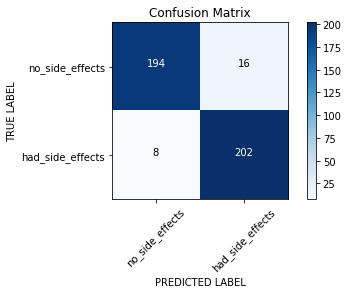

In [39]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#### total 420 predictions (194+16+8+202)

## SAVE AND LOAD the MODEL

### 1. model.save()

In [43]:
import os.path

#checks first to see if file already exists; if not, model is saved to disk

if os.path.isfile('medical_trial_model.h5') is False:
    model.save('medical_trial_model.h5')


This save function saves:
    
    * architecture of model, allowing to re-create vmodel
    * weights of model
    * training configuration (loss, optimizer)
    * state of optimizer(allowing to resume wher you left)

In [44]:
from tensorflow.keras.models import load_model
new_model = load_model('medical_trial_model.h5')

W0628 17:16:23.353070 140060496435008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0628 17:16:23.355358 140060496435008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [45]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [47]:
# new_model.get_weights()
new_model.optimizer

### 2. model.to_json()

If you only want to save the architecture of the model and not its weights or training configuration, use this function.

In [48]:
# save as JSON
json_string = model.to_json()

#save as YAML
# yaml_string = model.to_yaml()

In [50]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": n

###                     model reconstruction from JSON

In [51]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [52]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

In [53]:
import os.path
if os.path.isfile('my_model_weights.h5') is False:
    model.save_weights('my_model_weights.h5')

In [54]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [56]:
model2.load_weights('my_model_weights.h5')

In [57]:
model2.get_weights()

[array([[ 0.6041174 , -0.08602118,  0.5428787 , -0.00269926,  0.33199432,
          0.366466  , -0.2690934 ,  0.18575789, -0.53320456,  0.20138848,
          0.6621503 , -0.2511335 , -0.45871472,  0.1460615 , -0.39808244,
          0.45476446]], dtype=float32),
 array([-0.12213531,  0.        , -0.13487554,  0.        , -0.10521121,
        -0.11140323,  0.        , -0.06957303,  0.        , -0.07466364,
        -0.12662992,  0.        ,  0.        ,  0.2265446 ,  0.        ,
        -0.12914164], dtype=float32),
 array([[-4.61414382e-02, -1.27808750e-02,  1.57052159e-01,
          1.23501301e-01, -2.56646544e-01,  3.81814241e-01,
         -2.62800604e-01, -2.24511921e-02, -7.50876293e-02,
         -2.44666114e-01, -1.08430728e-01, -9.21803489e-02,
          9.86567661e-02,  2.31543779e-01, -1.79205582e-01,
         -1.64363652e-01,  1.89202309e-01,  1.85583085e-01,
         -3.23811144e-01, -2.53889233e-01, -1.41784891e-01,
          9.44233313e-02,  7.06501231e-02, -3.21416676e-01,
 